In [115]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [116]:
from PIL import Image

# Get all the images in the directory datasets/forest-images
filepaths = [os.path.join('datasets/forest-images', f) for f in os.listdir('datasets/forest-images')]

image = np.asarray(Image.open(filepaths[3]))
image.shape

(256, 256, 3)

## Imagine you as a urban planner who care a lot about the environment...

and you want to know the size of the forest in your city. Having access to a bunch of satellite images of the city's forest and a bit of knowledge of machine learning, you can automate the task of segmenting forest areas in your images and get a good estimate of the size of the forest in your city.

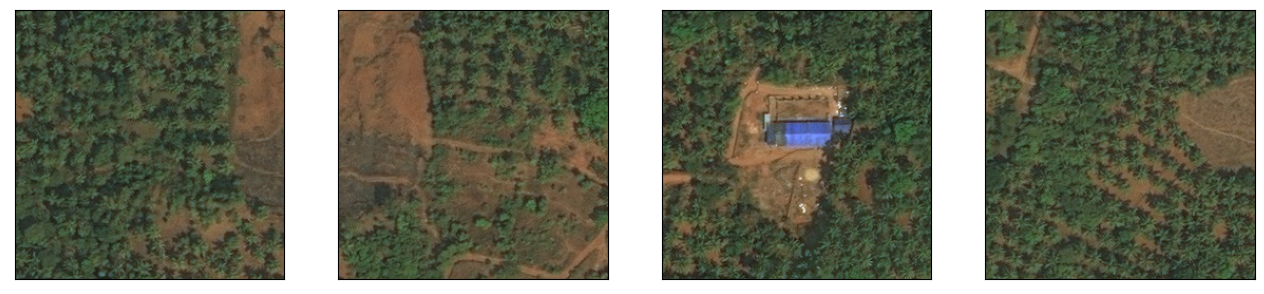

In [117]:
fig, axes = plt.subplots(1, 4, figsize=(16, 8), )
for i, ax in enumerate(axes.T):
    image = np.asarray(Image.open(filepaths[i]))
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])

## Introducing k-means

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

[From Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)

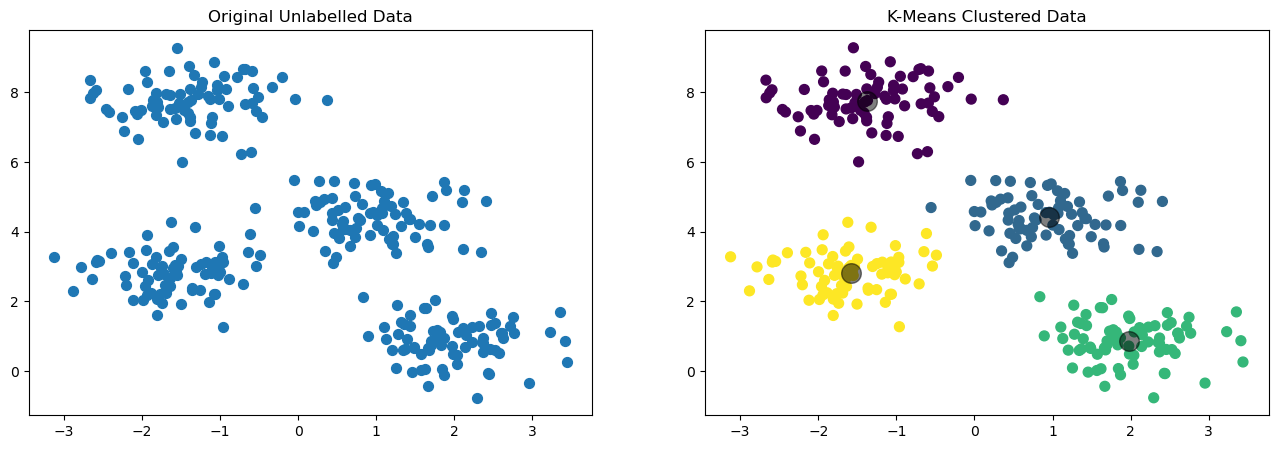

In [118]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].scatter(X[:, 0], X[:, 1], s=50)
ax[0].set_title('Original Unlabelled Data')

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

ax[1].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax[1].set_title('K-Means Clustered Data')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## The same idea applied to images

The k-means algorithm can be applied to images as well. The idea is to treat each pixel in the image as a data point, with the value of all channels as dimensions, and use the k-means algorithm to find the pre-determined number of clusters. 

The clusters correspond to segments of the image. The cluster centers are the color values of the pixels at the center of the segments. The segmentation is done by replacing each pixel's color value with the color value of the center of the pixel's cluster. The result is an image where the pixels are colored with the average color value of the pixels in the segment to which they belong.

Text(0.5, 1.0, 'Original Image')

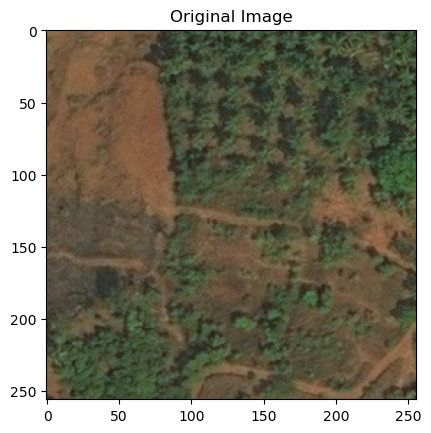

In [119]:
image = np.asarray(Image.open(filepaths[1]))
plt.imshow(image)
plt.title('Original Image')

In [120]:
# Reshape the image to be a list of pixels
X = image.reshape(-1, 3)
X

array([[139, 108,  79],
       [137, 106,  75],
       [134, 103,  72],
       ...,
       [ 88,  90,  68],
       [ 95,  89,  67],
       [ 68,  56,  34]], dtype=uint8)

Text(0.5, 1.0, 'Segmented Image')

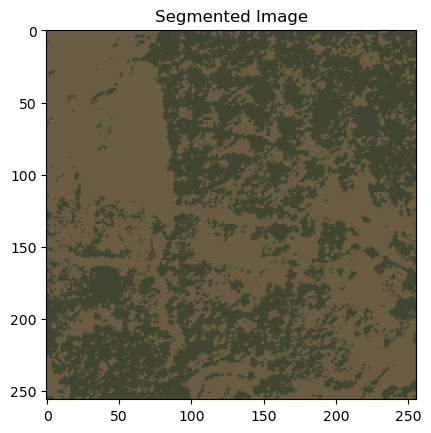

In [121]:
kmeans = KMeans(n_clusters=2, random_state=42, ).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img / 255)
plt.title('Segmented Image')

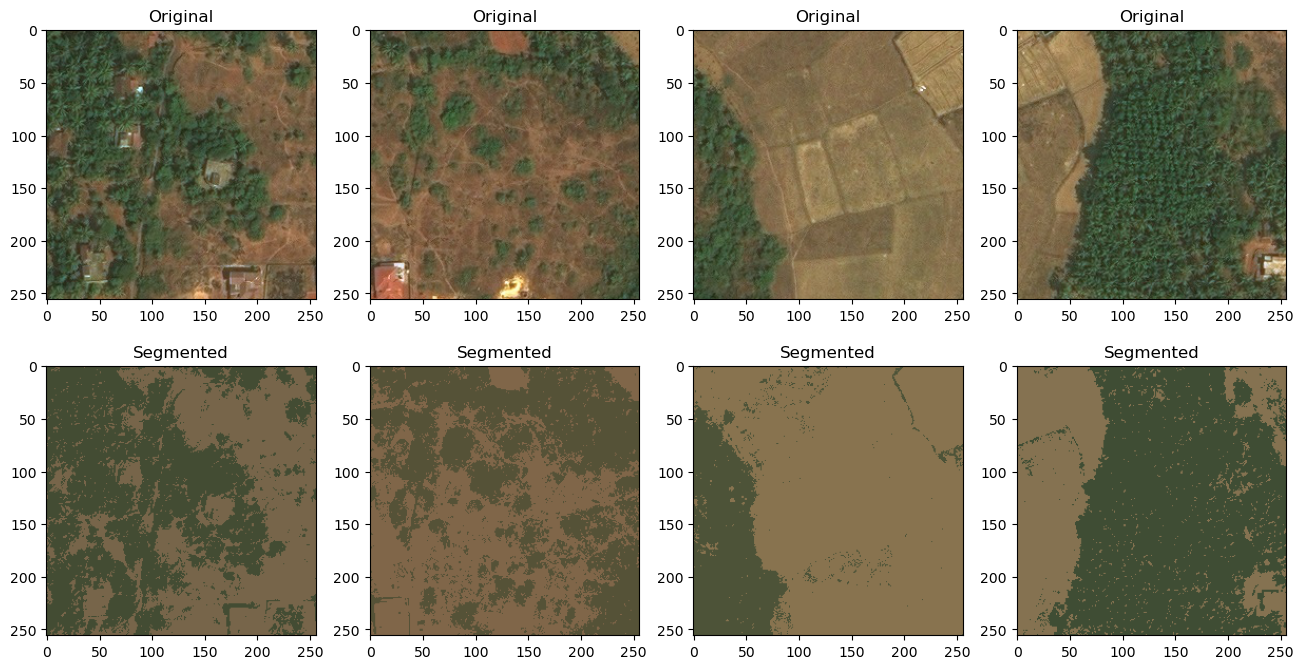

In [122]:
# Plot 4 images with the above row of the plot showing the original image and the below row showing the segmented image
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i, ax in enumerate(axes.T):
    image = np.asarray(Image.open(filepaths[14+i]))
    X = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=2, random_state=42, ).fit(X)
    ax[0].imshow(image)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape)
    ax[1].imshow(segmented_img / 255)
    ax[0].set_title('Original')
    ax[1].set_title('Segmented')

plt.show()